# Project 1 - Household Dataset

 ## • Part B: Practical (using Python, Excel, or Google Sheets)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load Dataset - Household
df = pd.read_csv("dataset_household.csv")

In [3]:
df

,Household_ID,Age_of_Household_Head,Household_Income,Education_Level,Family_Size,Owns_House,Urban_Rural
0,HH0001,63,61044,Graduate,2,No,Rural
1,HH0002,53,72214,Graduate,3,Yes,Urban
2,HH0003,39,38827,Post-Grad,9,No,Rural
3,HH0004,67,60820,Graduate,7,Yes,Rural
4,HH0005,32,67623,Graduate,4,Yes,Rural
...,...,...,...,...,...,...,...
155,HH0156,28,95272,Primary,6,No,Urban
156,HH0157,54,43467,Graduate,1,No,Urban
157,HH0158,61,28328,Primary,2,Yes,Rural
158,HH0159,47,96412,Secondary,1,No,Urban


 ### 3. Types of Data
 #### - Identify which columns are categorical and which are numerical.

In [4]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['Household_ID', 'Education_Level', 'Owns_House', 'Urban_Rural']
Numerical Columns: ['Age_of_Household_Head', 'Household_Income', 'Family_Size']


### 4. Central Tendency
### • Calculate Mean, Median, and Mode of Household Income and Age
### • Interpret the central tendency and comment on income distribution. 

In [5]:
# Calculating Mean, Median, and Mode of Household Age

# Mean
mean_of_age = sum(df['Age_of_Household_Head'])/len(df['Age_of_Household_Head'])
print(f"Mean of Age : {mean_of_age} ")

# Median
sorted_age = df['Age_of_Household_Head'].sort_values().reset_index(drop=True)
n = len(sorted_age)
median_of_age = (sorted_age[n//2 - 1] + sorted_age[n//2]) / 2
print(f"Median of Age : {median_of_age}")

# Mode
age = list(df['Age_of_Household_Head'])
age_mode = max(set(age), key=age.count)
print(f"Mode of Age: {age_mode}")

Mean of Age : 49.01875 
Median of Age : 49.0
Mode of Age: 48


Interpretation:

Age of Household Head:

- Usually closer to normal distribution.
- If Mean ≈ Median ≈ Mode, the data is likely symmetrical.

Conclusion:

For age, the mean, median, and mode are quite close, suggesting a fairly normal distribution with most household heads in a similar age range.

In [6]:
# Calculating Mean, Median, and Mode of Household Income.
# Mean
mean_of_income = sum(df['Household_Income'])/len(df['Household_Income'])
print(f"Mean of Income : {mean_of_income}")

# Median
sorted_income = df['Household_Income'].sort_values().reset_index(drop=True)
n1 = len(sorted_income)
median_of_income = (sorted_income[n1//2 - 1] + sorted_income[n1//2]) / 2
print(f"Median of Income : {median_of_income}")

# Mode
income = list(df['Household_Income'])
mode_of_income = max(set(income), key=income.count)
print(f"Mode of Income: {mode_of_income}")

Mean of Income : 52763.14375
Median of Income : 54002.5
Mode of Income: 11776


Interpretation:

Household Income:

- Mean shows the average income.
- Median is the middle value — useful when there are outliers (like a few very high incomes).
- Mode shows the most common income level.

Conclusion:
- The mean household income is 52736.14, whereas the median income is 54002 which states that income distribution is slightly left-skewed (negatively skewed).This means most households earn above the average income, but a few low-income outliers are pulling the mean down. 

### 5. Measures of Dispersion
### • Calculate Range, Variance, and Standard Deviation of Household Income.
### • Find IQR (Interquartile Range) and comment on income spread.

In [7]:
# Calculate Range, Variance, and Standard Deviation of Household Income.
# Range
range_of_income = max(df['Household_Income']) - min(df['Household_Income'])
print(f"Range of the Income : {range_of_income}")

# Variance 
income = list(df['Household_Income'])
mean_income = sum(income) / len(income)
squarred_diff = [(x - mean_income) ** 2 for x in income]
variance_of_income = round(sum(squarred_diff)/len(income),2)
sample_variance_of_income = round(sum(squarred_diff)/(len(income) - 1),2)
print(f"Population Variance of Income : {variance_of_income}")
print(f"Sample Variance of Income : {sample_variance_of_income}")

# Standard Deviation 
import math
std_of_income = round(math.sqrt(variance_of_income),2)
print(f"Standard Deviation of Income : {std_of_income}")

Range of the Income : 94002
Population Variance of Income : 794822668.76
Sample Variance of Income : 799821553.47
Standard Deviation of Income : 28192.6


In [8]:
# Find IQR (Interquartile Range) and comment on income spread.
data = np.array(df['Household_Income'])
quartile_1 = np.percentile(data,25)
quartile_2 = np.percentile(data,50)
quartile_3 = np.percentile(data,75)
print(f"Quartile 1 : {quartile_1}")
print(f"Quartile 2 : {quartile_2}")
print(f"Quartile 3 : {quartile_3}")

IQR = quartile_3 - quartile_1
print(f"Interquartile Range : {IQR}")

Quartile 1 : 28163.75
Quartile 2 : 54002.5
Quartile 3 : 73920.75
Interquartile Range : 45757.0


### 6. Distribution
### • Plot a histogram of Household Income.
### • Fit a Gaussian Normal Distribution curve.
### • Calculate Skewness and Kurtosis of the income data.

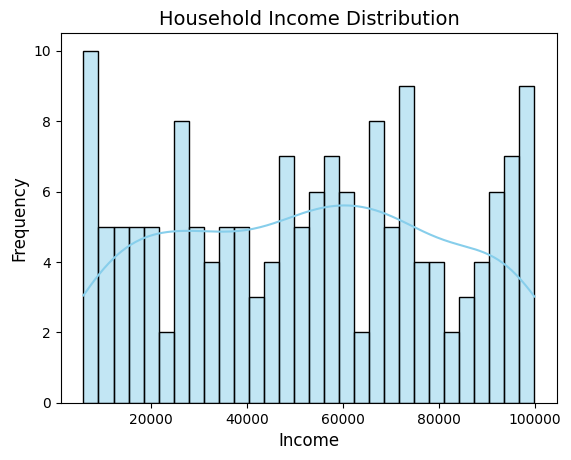

In [9]:
# Plot a histogram of Household Income.
income = df['Household_Income']

sns.histplot(income, bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title("Household Income Distribution", fontsize=14)
plt.xlabel("Income", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

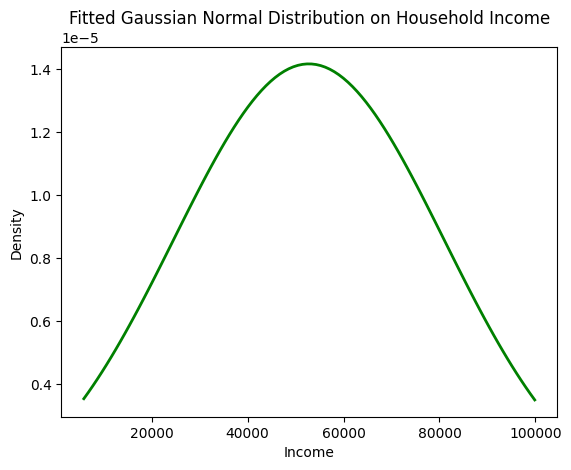

In [10]:
# Fit a Gaussian Normal Distribution curve.
from scipy.stats import norm
mean = np.mean(income)
std = np.std(income)
x = np.linspace(min(income), max(income), 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y, color='green', linewidth=2, label='Fitted Normal Curve')
plt.title("Fitted Gaussian Normal Distribution on Household Income")
plt.xlabel("Income")
plt.ylabel("Density")
plt.show()

In [11]:
# Calculate Skewness and Kurtosis of the income data.
# Skewness
skewness_numerator = sum([(x - mean_income)**3 for x in data]) / len(data)
skewness = skewness_numerator / (std_of_income ** 3)
print(f"Skewness: {skewness:.2f}")

# Kurtosis
kurtosis_numerator = sum([(x - mean_income)**4 for x in data]) / len(data)
kurtosis = kurtosis_numerator / (std_of_income ** 4)
print(f"Kurtosis: {kurtosis:.2f}")

Skewness: -0.00
Kurtosis: 1.84


### 7. Data Categorization
### - Use visualization (boxplot, histogram) to compare household income across
### different education levels or urban/rural areas.

C:\Users\devsu\AppData\Local\Temp\ipykernel_13232\3801398085.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Education_Level', y='Household_Income', palette='Set2')


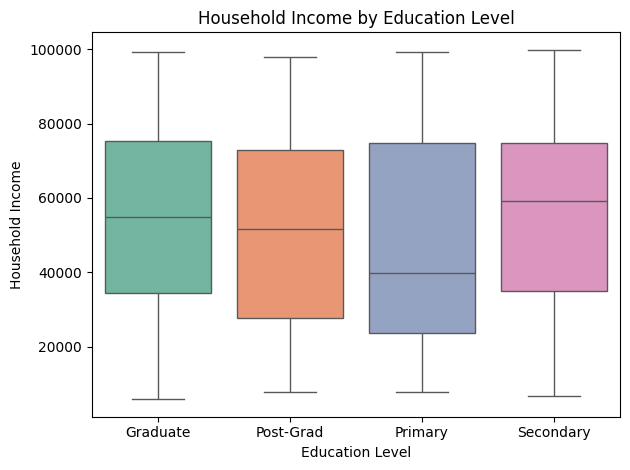

In [12]:
# Household income vs Education level 
sns.boxplot(data=df, x='Education_Level', y='Household_Income', palette='Set2')
plt.title("Household Income by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Household Income")
plt.tight_layout()
plt.show()

C:\Users\devsu\AppData\Local\Temp\ipykernel_13232\1960576236.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Urban_Rural', y='Household_Income', palette='Set3')


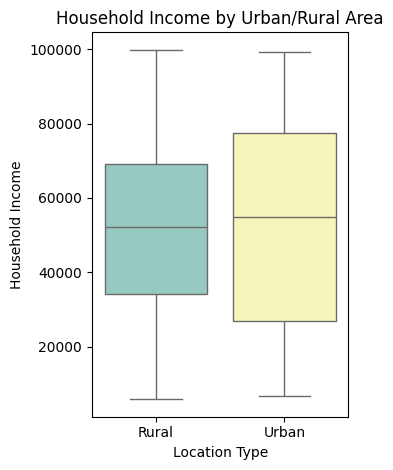

In [13]:
# Household Income vs urban/rural
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Urban_Rural', y='Household_Income', palette='Set3')
plt.title("Household Income by Urban/Rural Area")
plt.xlabel("Location Type")
plt.ylabel("Household Income")
plt.tight_layout()
plt.show()

### Visualizations
### • Histogram and KDE (Kernel Density Estimation) plot
### • Boxplot comparing Family Size by Education Level
### • Distribution Curve for Age vs. Income

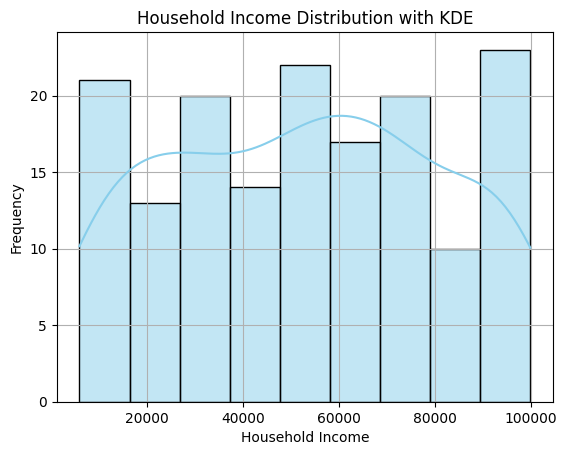

In [14]:
# Histogram + KDE for Household Income
sns.histplot(df['Household_Income'], kde=True, color='skyblue', edgecolor='black')
plt.title("Household Income Distribution with KDE")
plt.xlabel("Household Income")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

C:\Users\devsu\AppData\Local\Temp\ipykernel_13232\2777471898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education_Level', y='Family_Size', data=df, palette='pastel')


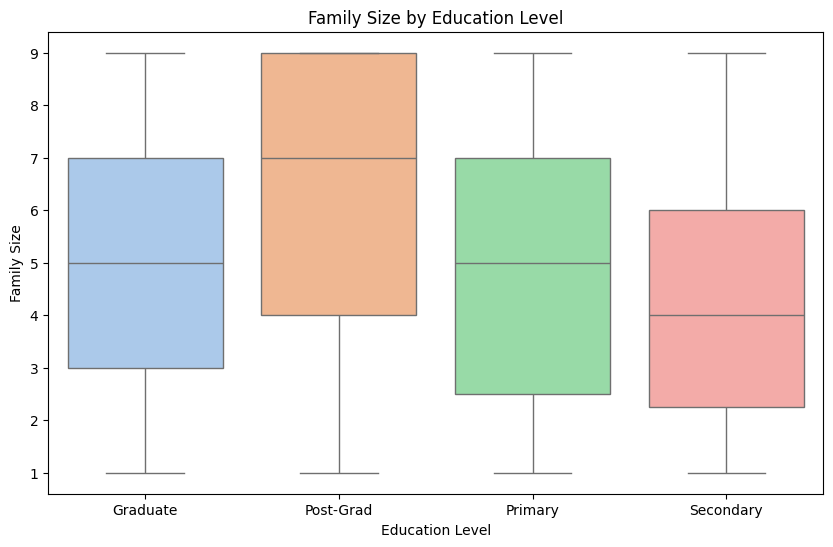

In [15]:
# Boxplot: Family Size by Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education_Level', y='Family_Size', data=df, palette='pastel')
plt.title("Family Size by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Family Size")
plt.show()

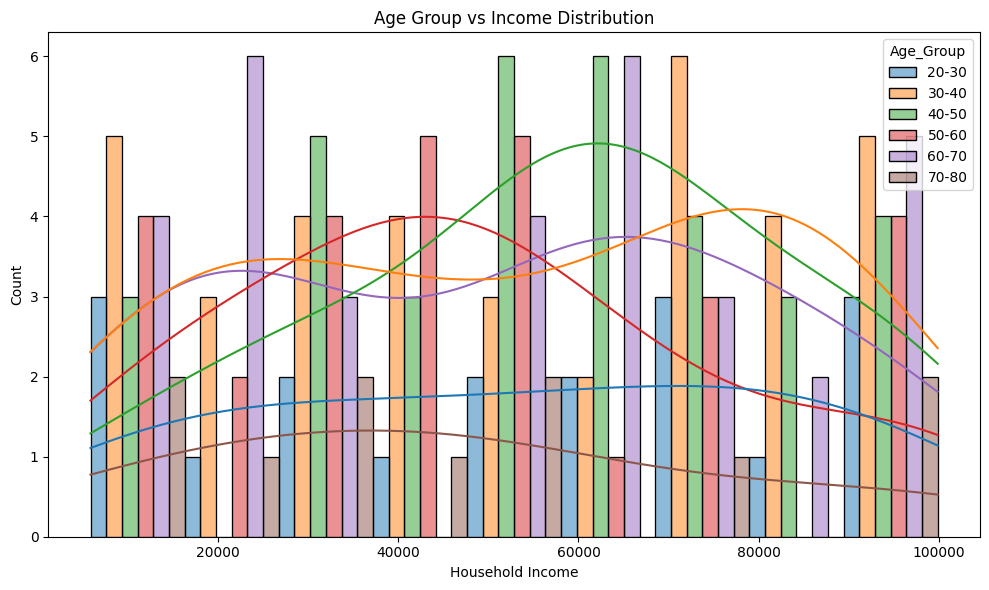

In [24]:
# Distribution Curve for Age vs. Income
df['Age_Group'] = pd.cut(df['Age_of_Household_Head'],bins=[20, 30, 40, 50, 60, 70, 80],labels=['20-30','30-40','40-50','50-60','60-70','70-80'])
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Household_Income', hue='Age_Group', multiple='dodge',kde=True)
plt.title("Age Group vs Income Distribution")
plt.xlabel("Household Income")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
